## Observations and Insights 

This study seems to be very well done. Only error found was the duplicate data input for Mice "g989". 

Main points found is that both Capomulin and Ramicane seem to be effective drugs in treating the tumor in the mice as shown by the box plots.

It was nice to see that the study used a similar number of mice for each drug and almost a 50/50 split of genders in the mice, making the results less prone to error due to outside variables. It would also be nice to understand how long each timepoint actually lasted to understand the study better.

It was also interesting to note how the weight of the mice affected the Tumor Volume, following a linear trend. To every gram increased in weight, there was a 0.89mm3 increase in Tumor Volume.

In [103]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from functools import reduce
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [104]:
# Checking the number of mice.
len(data["Mouse ID"].unique())

249

In [105]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = data[data.duplicated(["Mouse ID","Timepoint"])]
duplicate.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [106]:
# Optional: Get all the data for the duplicate mouse ID. 
m_ids = data.set_index("Mouse ID")
m_ids.loc["g989"]


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [107]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data = data.drop_duplicates(subset=["Mouse ID", "Timepoint"])

In [108]:
# Checking the number of mice in the clean DataFrame.
len(data["Mouse ID"].unique())

249

## Summary Statistics

In [109]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group = data.groupby("Drug Regimen")
tmean = regimen_group["Tumor Volume (mm3)"].mean().to_frame()
tmean.columns = ["Mean"]
tmedian = regimen_group["Tumor Volume (mm3)"].median().to_frame()
tmedian.columns = ["Median"]
tvar = regimen_group["Tumor Volume (mm3)"].var().to_frame()
tvar.columns = ["Variance"]
tstdev = regimen_group["Tumor Volume (mm3)"].std().to_frame()
tstdev.columns = ["Standard Deviation"]
tSEM = regimen_group["Tumor Volume (mm3)"].sem().to_frame()
tSEM.columns = ["SEM"]
# This method is the most straighforward, creating multiple series and putting them all together at the end.
dfs = [tmean, tmedian, tvar, tstdev, tSEM]
summary = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), dfs)
summary


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

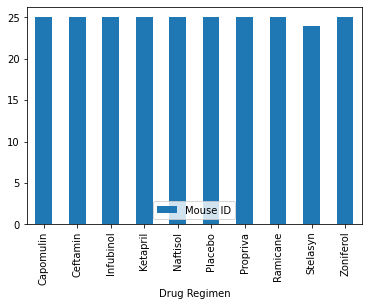

In [110]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bardata = data.drop_duplicates(subset ="Mouse ID")
bargroup = bardata.groupby("Drug Regimen")
count = bargroup["Mouse ID"].count().to_frame()
count = count.reset_index()
count.plot(kind="bar", x = "Drug Regimen", y = "Mouse ID")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

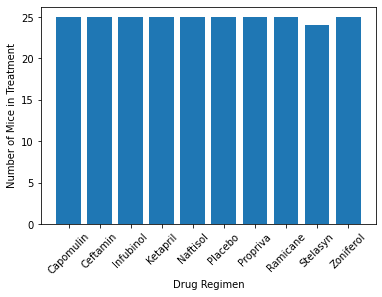

In [111]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
bargroup = bardata.groupby("Drug Regimen")
count = bargroup["Mouse ID"].count().to_frame()
count = count.reset_index()
plt.bar(count["Drug Regimen"], count["Mouse ID"])
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice in Treatment")
plt.xticks(rotation = 45)


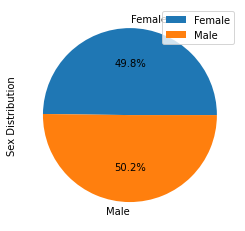

In [112]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
piegroup = bardata.groupby("Sex")
count = piegroup["Mouse ID"].count().to_frame()
count.columns = ["Sex Distribution"]
count.plot.pie(y = "Sex Distribution", autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x27addefe670>,
 [Text(0.006939175976765795, 1.0999781124353174, 'Female'),
  Text(-0.006939175976765929, -1.0999781124353174, 'Male')],
 [Text(0.0037850050782358875, 0.5999880613283548, '49.8%'),
  Text(-0.003785005078235961, -0.5999880613283548, '50.2%')])

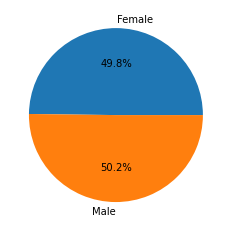

In [113]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count = count.reset_index()
plt.pie(count["Sex Distribution"], labels = count["Sex"], autopct="%1.1f%%")



## Quartiles, Outliers and Boxplots

In [114]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp = data.drop_duplicates(subset = "Mouse ID", keep = "last")
last_tp
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [140]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
drug_regimen=[]
ftv=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    for index, row in last_tp.iterrows():
        drug = last_tp.at[index, "Drug Regimen"]
        if drug == treatment:
            ftv.append(last_tp.at[index, "Tumor Volume (mm3)"])
            drug_regimen.append(treatment)

    
    
#Create new dataframe pt (Promising treatments)
dic = {"Drug Regimen": drug_regimen, "Final Tumor Volume (mm3)": ftv}
pt = pd.DataFrame(data=dic)

tumor_volume=[]

for x in treatments_list:
    tumor_volume.append(pt.loc[pt["Drug Regimen"]==x]["Final Tumor Volume (mm3)"])

quartiles_list = []

for x in tumor_volume:
    quartiles_list.append(x.quantile([.25,.50,.75]))
    
iqr = []
upper = []
lower = []
for x in quartiles_list:
    iqr.append(x[0.75]-x[0.25])
    upper.append(x[0.5]+1.5*(x[0.75]-x[0.25]))
    lower.append(x[0.5]-1.5*(x[0.75]-x[0.25]))

    
qdicts = {"Drug Regimen": treatments_list, "Quartiles": quartiles_list, "IQR": iqr, "Upper Bound": upper, "Lower Bound": lower}

quartilesdf= pd.DataFrame(data=qdicts)
quartilesdf


,Drug Regimen,Quartiles,IQR,Upper Bound,Lower Bound
0,Capomulin,0.25 32.377357 0.50 38.125164 0.75 40...,7.781863,49.797960,26.452369
1,Ramicane,0.25 31.560470 0.50 36.561652 0.75 40...,9.098537,50.209457,22.913847
2,Infubinol,0.25 54.048608 0.50 60.165180 0.75 65...,11.477135,77.380883,42.949478
3,Ceftamin,0.25 48.722078 0.50 59.851956 0.75 64...,15.577752,83.218584,36.485327


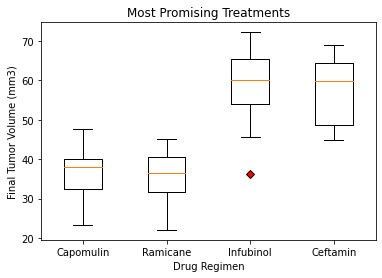

Here we can see that Infubinol has an outlier


In [142]:
# Determine outliers using upper and lower bounds
cap_data = pt.loc[pt["Drug Regimen"] == "Capomulin"]
ram_data = pt.loc[pt["Drug Regimen"] == "Ramicane"]
inf_data = pt.loc[pt["Drug Regimen"] == "Infubinol"]
cef_data = pt.loc[pt["Drug Regimen"] == "Ceftamin"]

cap_list = cap_data["Final Tumor Volume (mm3)"].tolist()
ram_list = ram_data["Final Tumor Volume (mm3)"].tolist()
inf_list = inf_data["Final Tumor Volume (mm3)"].tolist()
cef_list = cef_data["Final Tumor Volume (mm3)"].tolist()

#Plot Treatments
plotdata = [cap_list,ram_list,inf_list,cef_list]
red_diamonds = dict(markerfacecolor='r', marker='D')
fig7, ax7 = plt.subplots()
ax7.set_title("Most Promising Treatments")
ax7.set_xlabel("Drug Regimen")
ax7.set_ylabel("Final Tumor Volume (mm3)")
ax7.boxplot(plotdata, flierprops = red_diamonds)
plt.xticks([1,2,3,4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()
print(f"Here we can see that Infubinol has an outlier")

## Line and Scatter Plots

Text(0.5, 1.0, 'Timepoint vs Tumor Volume for mouse s185')

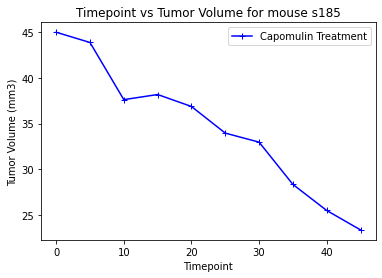

In [96]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = data.set_index("Drug Regimen")
capomulin_data = capomulin.loc["Capomulin"]
capomulin_mouse = capomulin_data["Mouse ID"].head().unique()[0]
plotdata = data.set_index("Mouse ID")
cmdata = plotdata.loc[capomulin_mouse]
line, = plt.plot(cmdata["Timepoint"], cmdata["Tumor Volume (mm3)"], marker="+", color="blue", label = "Capomulin Treatment")
plt.legend(handles=[line], loc="best")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Timepoint vs Tumor Volume for mouse {capomulin_mouse}")

In [97]:
weight_group = capomulin_data.groupby("Weight (g)")
tumor_mean = weight_group["Tumor Volume (mm3)"].mean().to_frame()
tumor_mean.columns = ["Avg Tumor Volume (mm3)"]
tumor_mean = tumor_mean.reset_index()
tumor_mean

,Weight (g),Avg Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


Text(0, 0.5, 'Average Tumor Volume (mm3)')

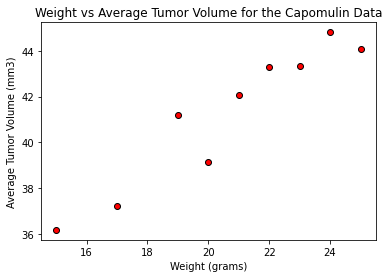

In [98]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_group = capomulin_data.groupby("Weight (g)")
tumor_mean = weight_group["Tumor Volume (mm3)"].mean().to_frame()
tumor_mean.columns = ["Avg Tumor Volume (mm3)"]
tumor_mean = tumor_mean.reset_index()
plt.scatter(tumor_mean["Weight (g)"], tumor_mean["Avg Tumor Volume (mm3)"], marker = "o", facecolors = "Red", edgecolors = "black")
plt.title(f"Weight vs Average Tumor Volume for the Capomulin Data")
plt.xlabel("Weight (grams)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

In [99]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = tumor_mean["Weight (g)"]
avg_tumor = tumor_mean["Avg Tumor Volume (mm3)"]
aw_slope, aw_int, aw_r, aw_p, aw_std_err = st.linregress(weight, avg_tumor)
aw_fit = aw_slope * weight + aw_int

The correlation coefficient between Weight and Average Tumor Volume is 0.95


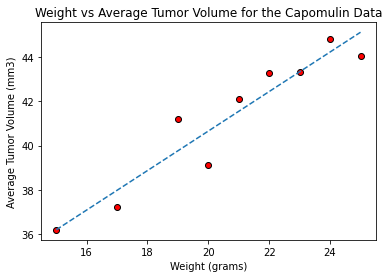

In [100]:
#Plot the linear model
plt.scatter(weight, avg_tumor, marker = "o", facecolors = "Red", edgecolors = "black")
plt.title(f"Weight vs Average Tumor Volume for the Capomulin Data")
plt.xlabel("Weight (grams)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(weight, aw_fit, "--")

#Correlation between Weight and Average Tumor Volume
print(f"The correlation coefficient between Weight and Average Tumor Volume is {round(st.pearsonr(weight,avg_tumor)[0],2)}")